In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import tqdm.notebook  as tqdm

## Kelly's criterion

You start with $x$, bet $n$ times with probability $p$ a fraction $f$ of your budget.
If you win the bet, you keep $b$ times the stake, otherwise you lose $a$ times that. Find the optimal $f$.
After $n$ bets, winning $w$ times, you have $S(f)=x(1+bf)^w(1-af)^{n-w}$.

The expected value of the logarithmic utility of $G(f)=\left(S(f)/x\right)^{\frac1n}$ is:
\begin{equation*}
    \mathbb E\left[\log G(f)\right]=\mathbb E\left[\frac wn\log(1+bf)+\left(1-\frac wn\right)\log(1-af)\right]=p\log(1+bf)+(1-p)\log(1-af).
\end{equation*}
Maximise wrt $f$:
\begin{equation*}
    \frac\partial{\partial f} \mathbb E\left[\log G(f)\right]=0=\frac{pb}{1+bf}-\frac{(1-p)a}{1-af}\Rightarrow
    f=\frac{pb-(1-p)a}{ab}.
\end{equation*}
E.g. fair coin, win or lose 1 ($a=b=1$), you get $f=0$, meaning it's better not to bet; but if $b=2$, $f=0.25$. See below:

In [2]:
n_games = 10000
x_start = 1.0
n = 500
p = 0.5
b = 2
a = 1

for f in tqdm.tqdm_notebook(np.linspace(0,1,11), desc = 'factor '):
    wins = 0
    prizes = []
    for game in range(n_games):
        x = x_start
        for i in range(n):
            S = f*x
            if np.random.uniform() > p:
                x += b*S
            else:
                x -= a*S
        if x > x_start:
            wins += 1
        prizes.append((x/x_start)**(1/n))
        if f == 0.2:
            work = prizes

    print('f = {:5.3f} - wins = {:7.3f} - mean profit = {:.6e}'.format(f,100*wins/n_games,np.mean(prizes)))

f = 0.000 - wins =   0.000 - mean profit = 1.000000e+00
f = 0.100 - wins = 100.000 - mean profit = 1.039294e+00
f = 0.200 - wins = 100.000 - mean profit = 1.058379e+00
f = 0.300 - wins =  99.920 - mean profit = 1.058086e+00
f = 0.400 - wins =  94.110 - mean profit = 1.039431e+00
f = 0.500 - wins =  48.470 - mean profit = 1.000681e+00
f = 0.600 - wins =   4.680 - mean profit = 9.387397e-01
f = 0.700 - wins =   0.050 - mean profit = 8.496823e-01
f = 0.800 - wins =   0.000 - mean profit = 7.217186e-01
f = 0.900 - wins =   0.000 - mean profit = 5.306027e-01
f = 1.000 - wins =   0.000 - mean profit = 0.000000e+00



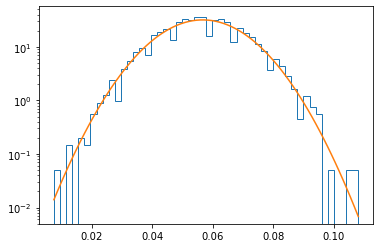

In [3]:
data = np.log(work)
mu = data.mean()
std = data.std()

plt.hist(data, bins = 50, density = True, log = True, histtype = 'step')
h = np.linspace(data.min(),data.max(),80)
plt.plot(h,sts.norm.pdf(h, loc = mu, scale = std))
plt.show()